In [ ]:
import os
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,BatchNormalization
import matplotlib.pyplot as plt
import os
import tarfile
import urllib
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50,VGG16



In [ ]:
# Download the dataset
url = "http://ufldl.stanford.edu/housenumbers/train_32x32.mat"
file_path = "train_32x32.mat"
if not os.path.isfile(file_path):
    urllib.request.urlretrieve(url, file_path)
    print("Dataset Downloaded!")
else:
    print("Dataset already exists.")

Dataset Downloaded!


In [ ]:
# Load the dataset
mat_data = sio.loadmat(file_path)
X = mat_data['X']
y = mat_data['y']

In [ ]:
# Change the shape of y to (number of samples,1)
y = y.reshape(-1)

In [ ]:
# Change the label of 10 to 0
y[y == 10] = 0

In [ ]:

# Reshape X to have the first axis as the number of samples
X = X.transpose((3, 0, 1, 2))
X = X.reshape(73257, 32, 32, 3)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize the data by dividing by 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Convert the labels to one-hot encoded format
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

In [ ]:
# Create a sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters and a kernel size of 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second 2D convolutional layer with 64 filters and a kernel size of 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add a max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer to flatten the previous output
model.add(Flatten())

# Add a dense layer with 128 units and a relu activation function
model.add(Dense(128, activation='relu'))

# Add a final dense layer with 10 units and a softmax activation function
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Data augmentation
data_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator.fit(X_train)

# Train the model on the training data
history = model.fit(data_generator.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1832/1832 [==============================] - 34s 18ms/step - loss: 1.5073 - accuracy: 0.4919 - val_loss: 0.8136 - val_accuracy: 0.7614
Epoch 2/10
1832/1832 [==============================] - 34s 19ms/step - loss: 0.9755 - accuracy: 0.6902 - val_loss: 0.6383 - val_accuracy: 0.8045
Epoch 3/10
1832/1832 [==============================] - 33s 18ms/step - loss: 0.8474 - accuracy: 0.7333 - val_loss: 0.5716 - val_accuracy: 0.8270
Epoch 4/10
1832/1832 [==============================] - 32s 18ms/step - loss: 0.7789 - accuracy: 0.7549 - val_loss: 0.5344 - val_accuracy: 0.8399
Epoch 5/10
1832/1832 [==============================] - 32s 18ms/step - loss: 0.7162 - accuracy: 0.7756 - val_loss: 0.5065 - val_accuracy: 0.8469
Epoch 6/10
1832/1832 [==============================] - 33s 18ms/step - loss: 0.6835 - accuracy: 0.7862 - val_loss: 0.4927 - val_accuracy: 0.8500
Epoch 7/10
1832/1832 [==============================] - 33s 18ms/step - loss: 0.6520 - accuracy: 0.7974 - val_loss: 0.4854 -

In [ ]:
# Train the model on the training data
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1832/1832 [==============================] - 11s 6ms/step - loss: 0.6191 - accuracy: 0.8137 - val_loss: 0.4633 - val_accuracy: 0.8626
Epoch 2/10
1832/1832 [==============================] - 8s 4ms/step - loss: 0.3765 - accuracy: 0.8898 - val_loss: 0.4093 - val_accuracy: 0.8812
Epoch 3/10
1832/1832 [==============================] - 10s 5ms/step - loss: 0.3028 - accuracy: 0.9106 - val_loss: 0.3773 - val_accuracy: 0.8925
Epoch 4/10
1832/1832 [==============================] - 9s 5ms/step - loss: 0.2549 - accuracy: 0.9241 - val_loss: 0.4372 - val_accuracy: 0.8775
Epoch 5/10
1832/1832 [==============================] - 9s 5ms/step - loss: 0.2097 - accuracy: 0.9368 - val_loss: 0.4017 - val_accuracy: 0.8967
Epoch 6/10
1832/1832 [==============================] - 9s 5ms/step - loss: 0.1785 - accuracy: 0.9451 - val_loss: 0.4406 - val_accuracy: 0.8916
Epoch 7/10
1832/1832 [==============================] - 10s 6ms/step - loss: 0.1481 - accuracy: 0.9539 - val_loss: 0.4327 - val_accura

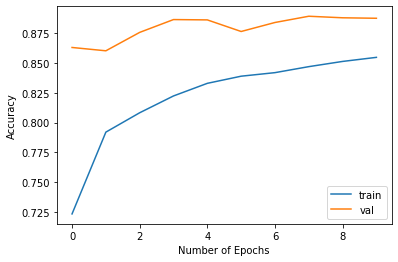

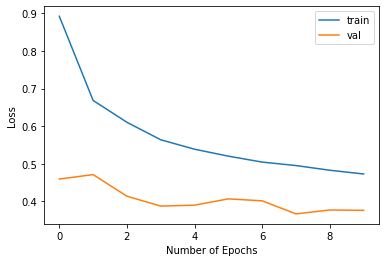

In [ ]:
# Plotting Loss and Accuracy

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

458/458 [==============================] - 1s 2ms/step


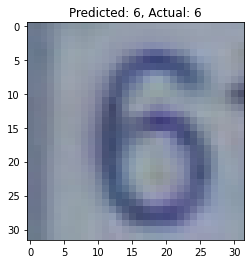

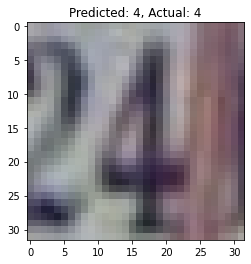

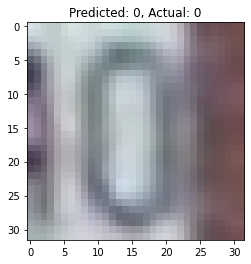

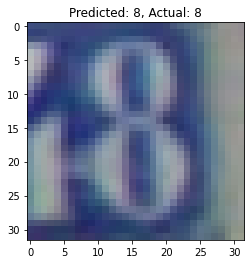

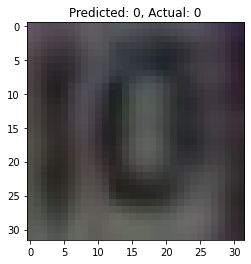

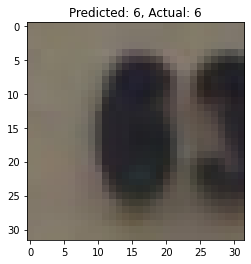

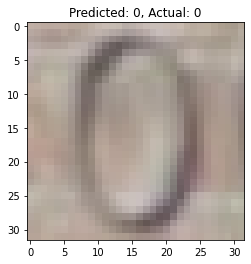

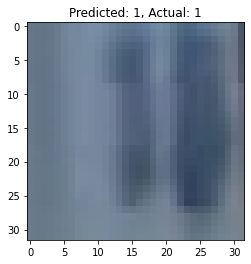

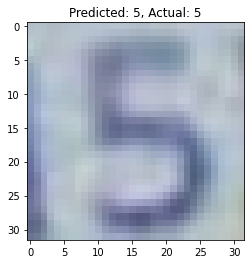

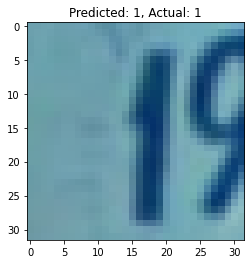

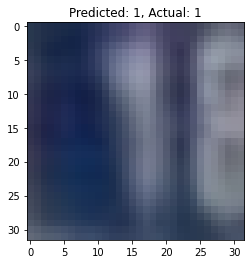

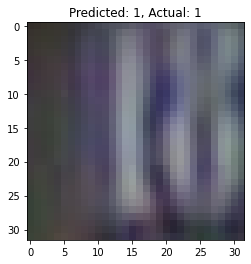

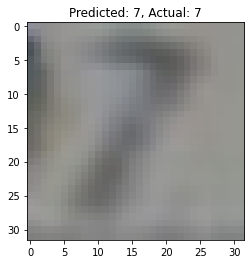

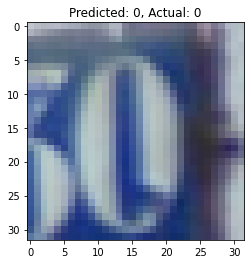

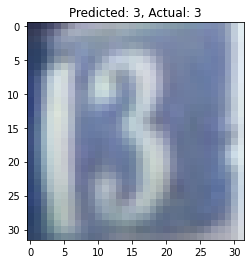

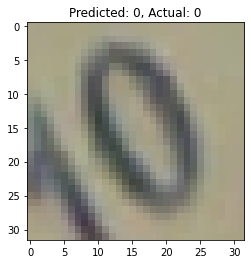

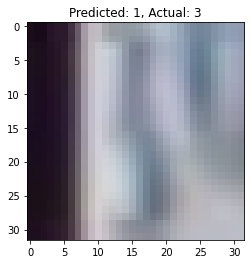

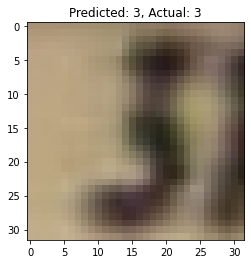

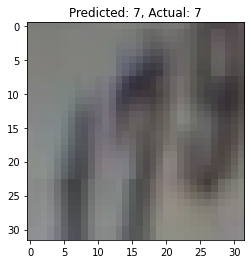

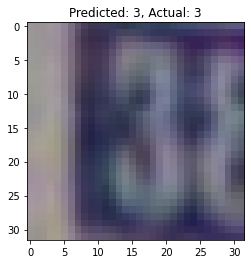

In [ ]:
# Plot the first 20 predictions and their corresponding labels
i  = 1
plt.imshow(X_test[i])
plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
plt.show()

In [ ]:
# Evaluation Metrics
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.18%


In [ ]:
# Precision
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision: {:.2f}".format(precision))

Precision: 0.86


In [ ]:

# Recall
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall: {:.2f}".format(recall))

Recall: 0.86


In [ ]:
# F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 Score: {:.2f}".format(f1))

F1 Score: 0.86


In [ ]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[ 827   44   13   11    8    2   19    7   10   18]
 [  21 2632   29   29   59    5   10   48   11    2]
 [   8   28 1931   27   45    8    3   36   22   25]
 [   5   41   34 1435   24   61   18   17   39   16]
 [   2   65   26   20 1278    6   13    7    9   14]
 [   1   16   13  131    9 1134   48    2   14    9]
 [  21   20   14   55   22   60  880    6   66    9]
 [   7   47   33   22    8    4    3  993    1    5]
 [  17   24   19   42   12   13   46    4  816   21]
 [  23   18   47   41   25   15    8    7   32  701]]


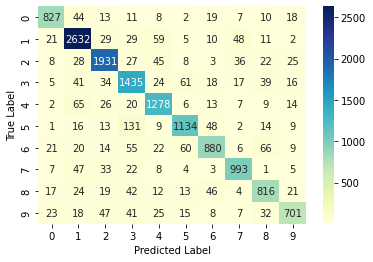

In [ ]:
import seaborn as sns

# Plotting confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
import pandas as pd

# Confusion Matrix
confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print("Confusion Matrix:\n", confusion_matrix)


Confusion Matrix:
 Predicted    0     1     2     3     4     5     6     7     8    9    All
True                                                                      
0          827    44    13    11     8     2    19     7    10   18    959
1           21  2632    29    29    59     5    10    48    11    2   2846
2            8    28  1931    27    45     8     3    36    22   25   2133
3            5    41    34  1435    24    61    18    17    39   16   1690
4            2    65    26    20  1278     6    13     7     9   14   1440
5            1    16    13   131     9  1134    48     2    14    9   1377
6           21    20    14    55    22    60   880     6    66    9   1153
7            7    47    33    22     8     4     3   993     1    5   1123
8           17    24    19    42    12    13    46     4   816   21   1014
9           23    18    47    41    25    15     8     7    32  701    917
All        932  2935  2159  1813  1490  1308  1048  1127  1020  820  14652
